In [1]:
import pandas as pd

# Carregando os dados

In [40]:
filmes =  pd.read_csv('ml-latest-small\movies.csv')

In [49]:
filmes.columns = ['filmesId', 'titulo', 'generos']
filmes = filmes.set_index('filmesId')
filmes.head()

,titulo,generos
filmesId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [50]:
notas = pd.read_csv('ml-latest-small/ratings.csv')

In [51]:
notas.columns = ['usuarioId', 'filmesId', 'nota', 'momento']
notas.head()

,usuarioId,filmesId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [52]:
notas.describe()

,usuarioId,filmesId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Primeira tentativa de recomendação uma heurística de total de votos

In [62]:
total_de_votos = notas['filmesId'].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmesId, dtype: int64

In [58]:
filmes.loc[318]

titulo     Shawshank Redemption, The (1994)
generos                         Crime|Drama
Name: 318, dtype: object

In [63]:
filmes['total_de_votos'] = total_de_votos

In [66]:
filmes.sort_values('total_de_votos', ascending = False).head()

,titulo,generos,total_de_votos
filmesId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


In [67]:
filmes.sort_values('total_de_votos', ascending = False).head(10)

,titulo,generos,total_de_votos
filmesId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


In [70]:
notas_medias = notas.groupby('filmesId').mean()['nota']

In [71]:
filmes['nota_media'] = notas_medias

In [74]:
filmes.sort_values('total_de_votos', ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmesId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


# Uma segunda heurística Nota média e filtrando votos

In [75]:
filmes.sort_values('nota_media', ascending = False)

,titulo,generos,total_de_votos,nota_media
filmesId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
...,...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN
32160,Twentieth Century (1934),Comedy,NaN,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN


In [76]:
filmes.query('total_de_votos >= 10').sort_values('nota_media', ascending = False)

,titulo,generos,total_de_votos,nota_media
filmesId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
...,...,...,...,...
3593,Battlefield Earth (2000),Action|Sci-Fi,19.0,1.657895
3564,"Flintstones in Viva Rock Vegas, The (2000)",Children|Comedy,12.0,1.625000
1556,Speed 2: Cruise Control (1997),Action|Romance|Thriller,19.0,1.605263


In [77]:
filmes_com_mais_de_50_votos = filmes.query('total_de_votos >= 50')
filmes_com_mais_de_50_votos.sort_values('nota_media', ascending = False)

,titulo,generos,total_de_votos,nota_media
filmesId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
...,...,...,...,...
172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53.0,2.679245
173,Judge Dredd (1995),Action|Crime|Sci-Fi,62.0,2.669355
432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,55.0,2.645455


In [79]:
eu_assisti = [1,21,19,10,7,2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmesId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [84]:
filmes_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos == 'Adventure|Children|Fantasy'")
filmes_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values('nota_media', ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmesId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


### Collaborative filtering (são recomendações baseadas em colaborações de outros usuários do sistema)

## x

### Content based filtering (preferência do usuário e seu conteúdo)

# Procurar usuários 'similares'

- João deu nota 4 no filme toy story
- Maria deu nota 5 no filme toy story
- Paulo deu nota 3 no filme toy story
- Joana deu nota 3.5 no filme toy story

In [87]:
# joao = [4,4.5]
# maria = [5,5]

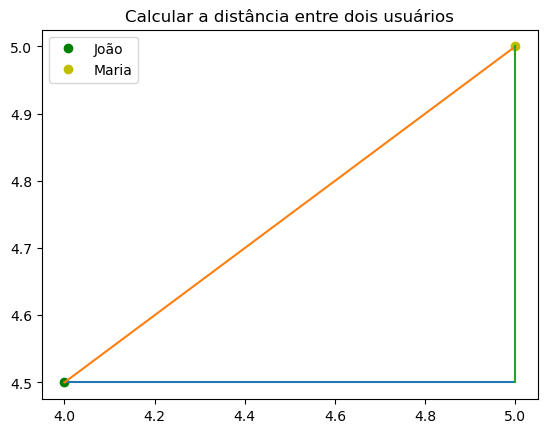

In [91]:
import matplotlib.pyplot as plt
plt.plot(4,4.5, "go")
plt.plot(5,5, 'yo')
plt.legend(['João', 'Maria'])
plt.title('Calcular a distância entre dois usuários')

plt.plot([4, 5], [4.5, 4.5], linestyle="-")
plt.plot([4, 5], [4.5, 5], linestyle="-")
plt.plot([5, 5], [5, 4.5], linestyle="-")

In [93]:
import numpy as np
joao = np.array([4,4.5])
maria = np.array([5,5])
joao-maria

array([-1. , -0.5])

In [96]:
from math import sqrt
def pitagoras(a,b):
    (delta_x, delta_y) = a-b
    return sqrt(delta_x **2 + delta_y**2)

pitagoras(joao, maria)

1.118033988749895

In [108]:
from math import sqrt
def pitagoras(a,b):
    return np.linalg.norm(a-b)

pitagoras(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'Calcular a distância entre dois usuários')

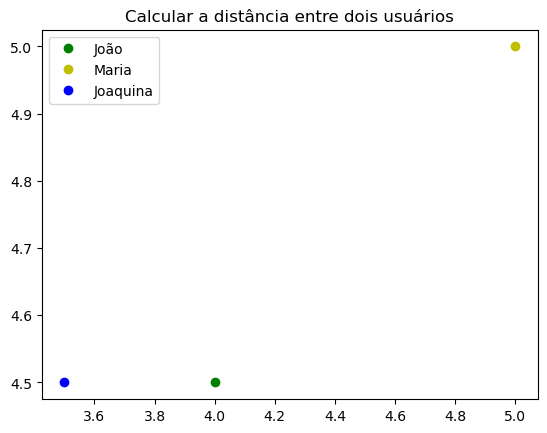

In [109]:
plt.plot(4,4.5, "go")
plt.plot(5,5, 'yo')
plt.plot(3.5, 4.5, 'bo')
plt.legend(['João', 'Maria', 'Joaquina'])
plt.title('Calcular a distância entre dois usuários')

In [110]:
joaquina = np.array([3.5, 4.5])
print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


In [136]:
def distancia_de_vetores(a,b):
    return np.linalg.norm(a-b)

In [112]:
notas.head()

,usuarioId,filmesId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [123]:
def notas_do_usuario(usuario):
    notas_do_usuario = notas.query(f'usuarioId =={usuario}')
    notas_do_usuario = notas_do_usuario[['filmesId', 'nota']].set_index('filmesId')
    return notas_do_usuario

In [127]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [128]:
usuario1.head()

,nota
filmesId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [133]:
usuario4.head()

,nota
filmesId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0


In [137]:
diferenca = usuario1.join(usuario4, lsuffix = '_esquerda', rsuffix = '_direita').dropna()
distancia_de_vetores(diferenca['nota_esquerda'], diferenca['nota_direita'])

11.135528725660043

In [153]:
def distancia_de_usuarios(usuario_id1,usuario_id2):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2,lsuffix = '_esquerda', rsuffix = '_direita').dropna()
    distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

In [154]:
distancia_de_usuarios(1,7)

[1, 7, 7.106335201775948]

In [157]:
quantidade_de_usuarios = len(notas['usuarioId'].unique())
quantidade_de_usuarios

610

In [171]:
voce_id = 1
def distancia_de_todos(voce_id):
    distancias = []
    for usuario_id in notas.query(f'usuarioId != {voce_id}')['usuarioId'].unique():
        informacoes = distancia_de_usuarios(voce_id, usuario_id)
        distancias.append(informacoes)
    return distancias

In [172]:
distancia_de_todos(1)[:5]

[[1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413],
 [1, 6, 8.602325267042627]]

In [209]:
voce_id = 1
def distancia_de_todos(voce_id):
        todos_os_usuarios = notas.query(f'usuarioId != {voce_id}')['usuarioId'].unique()
        distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
        distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
        return distancias

In [218]:
voce_id = 1
def distancia_de_todos(voce_id):
        todos_os_usuarios = notas['usuarioId'].unique()
        distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
        distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
        return distancias

# Usuários sem nada em comum são colocados bem distante um do outro

In [214]:
def distancia_de_usuarios(usuario_id1,usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2,lsuffix = '_esquerda', rsuffix = '_direita').dropna()
    if len(diferencas) < minimo:
        return [usuario_id1, usuario_id2, 100000]
    distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

In [225]:
def mais_proximos_de(voce_id):
    distancias = distancia_de_todos(voce_id)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    return distancias

In [226]:
mais_proximos_de(5)

,voce,distancia
outra_pessoa,,
152,5,1.414214
399,5,1.500000
125,5,1.581139
503,5,1.732051
493,5,1.732051
...,...,...
98,5,100000.000000
355,5,100000.000000
351,5,100000.000000


# Parâmetros para teste

In [289]:
def mais_proximos_de(voce_id, numeros_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    return distancias

def distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar):
        todos_os_usuarios = notas['usuarioId'].unique()
        if numeros_de_usuarios_a_analisar:
            todos_os_usuarios = todos_os_usuarios[:numeros_de_usuarios_a_analisar]
        distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
        distancias = list(filter(None, distancias))
        distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
        return distancias
    
def distancia_de_usuarios(usuario_id1,usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2,lsuffix = '_esquerda', rsuffix = '_direita').dropna()
    if len(diferencas) < minimo:
        return None
    distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

def sugere_para(voce, numeros_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index
    similares =mais_proximos_de(voce, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
    similar = similares.iloc[0].name

    notas_do_similar = notas_do_usuario(similar)
    notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors = 'ignore')
    recomendacoes = notas_do_similar.sort_values('nota', ascending = False)
    return recomendacoes.join(filmes)

In [297]:
sugere_para(2)

,nota,titulo,generos,total_de_votos,nota_media
filmesId,,,,,
3083,5.0,All About My Mother (Todo sobre mi madre) (1999),Drama,19.0,4.157895
2360,5.0,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
27815,5.0,"Chorus, The (Choristes, Les) (2004)",Drama,11.0,3.909091
296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
3451,5.0,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
...,...,...,...,...,...
4718,1.0,American Pie 2 (2001),Comedy,45.0,3.066667
2002,0.5,Lethal Weapon 3 (1992),Action|Comedy|Crime|Drama,46.0,2.934783
7016,0.5,Over the Top (1987),Action|Drama,3.0,1.500000


# Sugerindo baseado em vários usuários

In [348]:
def mais_proximos_de(voce_id, n_mais_proximos, numeros_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id, errors = 'ignore')
    return distancias.head(n_mais_proximos)


def sugere_para(voce, n_mais_proximos = 10, numeros_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares =mais_proximos_de(voce, n_mais_proximos = n_mais_proximos, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby('filmesId').mean()[['nota']]
    recomendacoes = recomendacoes.sort_values('nota', ascending = False)
    return recomendacoes.join(filmes).head(n_mais_proximos)

In [326]:
sugere_para(44,3)

,nota,titulo,generos,total_de_votos,nota_media
filmesId,,,,,
1625,5.0,"Game, The (1997)",Drama|Mystery|Thriller,77.0,3.701299
2001,5.0,Lethal Weapon 2 (1989),Action|Comedy|Crime|Drama,47.0,3.180851
318,5.0,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022


# Testar um usuário novo

In [332]:
filmes.loc[[122904, 1246, 2529,2324,1,7,2,1196,260]]

,titulo,generos,total_de_votos,nota_media
filmesId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54.0,3.833333
1246,Dead Poets Society (1989),Drama,86.0,3.959302
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,56.0,3.803571
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,88.0,4.147727
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076


In [337]:
def novo_usuario(dados):
    novo_usuario = notas['usuarioId'].max()+1
    notas_do_usuario_novo = pd.DataFrame(dados, columns  = ['filmesId', 'nota'])
    notas_do_usuario_novo['usuarioId'] = novo_usuario
    return pd.concat([notas, notas_do_usuario_novo])

In [338]:
dados = [[122904,2], 
        [1246,5],
        [2529,2],
        [2329,5],
        [2324,5],
        [1,2],
        [7,0.5],
        [2,2],
        [1196,1],
        [260,1]]

In [340]:
notas = novo_usuario(dados)
notas.tail()

,usuarioId,filmesId,nota,momento
5,611,1,2.0,NaN
6,611,7,0.5,NaN
7,611,2,2.0,NaN
8,611,1196,1.0,NaN
9,611,260,1.0,NaN


In [341]:
sugere_para(611).head()

,nota,titulo,generos,total_de_votos,nota_media
filmesId,,,,,
171495,5.0,Cosmos,(no genres listed),2.0,4.500000
81847,5.0,Tangled (2010),Animation|Children|Comedy|Fantasy|Musical|Roma...,24.0,3.916667
1873,5.0,"Misérables, Les (1998)",Crime|Drama|Romance|War,10.0,3.750000
8014,5.0,"Spring, Summer, Fall, Winter... and Spring (Bo...",Drama,10.0,4.250000
103141,5.0,Monsters University (2013),Adventure|Animation|Comedy,16.0,3.875000


# Utilizar somente as notas de filmes com mais de 50 votos

In [344]:
notas = notas.set_index('filmesId').loc[filmes_com_mais_de_50_votos.index]

In [345]:
notas.head()

,usuarioId,nota,momento
filmesId,,,
1,1,4.0,9.649827e+08
1,5,4.0,8.474350e+08
1,7,4.5,1.106636e+09
1,15,2.5,1.510578e+09
1,17,4.5,1.305696e+09


In [346]:
notas = notas.reset_index()
notas.head()

,filmesId,usuarioId,nota,momento
0,1,1,4.0,9.649827e+08
1,1,5,4.0,8.474350e+08
2,1,7,4.5,1.106636e+09
3,1,15,2.5,1.510578e+09
4,1,17,4.5,1.305696e+09


In [347]:
sugere_para(611).head()

,nota,titulo,generos,total_de_votos,nota_media
filmesId,,,,,
112852,5.000000,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59.0,4.050847
74458,4.750000,Shutter Island (2010),Drama|Mystery|Thriller,67.0,4.022388
71535,4.666667,Zombieland (2009),Action|Comedy|Horror,53.0,3.877358
78499,4.500000,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,55.0,4.109091
2804,4.500000,"Christmas Story, A (1983)",Children|Comedy,55.0,3.972727


In [353]:
def sugere_para(voce, n_mais_proximos = 10, numeros_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares =mais_proximos_de(voce, n_mais_proximos = n_mais_proximos, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby('filmesId').mean()[['nota']]
    aparicoes = notas_dos_similares.groupby('filmesId').count()[['nota']]
    
    
    filtro_minimo = n_mais_proximos //2
    recomendacoes = recomendacoes.join(aparicoes, lsuffix = '_media_dos_usuarios', rsuffix = '_aparicoes_nos_usuarios')
    recomendacoes = recomendacoes.query(f'nota_aparicoes_nos_usuarios > = {filtro_minimo}')
    
    recomendacoes = recomendacoes.sort_values('nota_media_dos_usuarios', ascending = False)
    recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu, errors = 'ignore')
    return recomendacoes.join(filmes).head(n_mais_proximos)

In [354]:
sugere_para(611, 30)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmesId,,,,,,
296,4.380000,25,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,4.326087,23,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
318,4.229167,24,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
1197,4.205882,17,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,142.0,4.232394
2858,4.200000,25,American Beauty (1999),Drama|Romance,204.0,4.056373
4878,4.200000,15,Donnie Darko (2001),Drama|Mystery|Sci-Fi|Thriller,109.0,3.981651
50,4.181818,22,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204.0,4.237745
2959,4.173077,26,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
3996,4.166667,15,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",Action|Drama|Romance,110.0,3.836364


In [359]:
sugere_para(60, 30)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmesId,,,,,,
296,4.407407,27,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
79132,4.400000,20,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
2959,4.365385,26,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1221,4.350000,20,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
2571,4.333333,27,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
750,4.333333,15,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
593,4.300000,25,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
4226,4.227273,22,Memento (2000),Mystery|Thriller,159.0,4.122642
1704,4.205882,17,Good Will Hunting (1997),Drama|Romance,141.0,4.078014
